# Exploratory Analysis of *Brazilian E-Commerce Public Dataset* by Olist

#### What is *Olist*?

Olist is an e-commerce platform developed to help shopkeepers to sell their products at brazilian marketplaces, such as Americanas, Submarino and Mercado Livre. 

The dataset has more than 100.000 orders that were made between june 2017 and january 2018. 

We all know that brazilians celebrate a lot and they like to gift the people they love. But, what exactly do brazilians usually buy for each occasion? 

---

The main ideia with this notebook is to understand the periods the consumers bought more and which products were more common on each occasion. 

I will also take a look on which payment methods were more susceptible to have the order approved and also, how much the costumers usually spend for each order.

### Libraries

In [5]:
import pandas as pd

In [103]:
#importing the datasets
df_items = pd.read_csv('datasets/olist_order_items_dataset.csv')
df_payments = pd.read_csv('datasets/olist_order_payments_dataset.csv')
df_orders = pd.read_csv('datasets/olist_orders_dataset.csv')
df_products = pd.read_csv('datasets/olist_products_dataset.csv')

In [104]:
#merging the datasets by their keys
df_orders = pd.merge(df_orders, df_items, on='order_id')
df_orders = pd.merge(df_orders, df_payments, on='order_id')
df_orders = pd.merge(df_orders, df_products, on='product_id')

Now that we merged all the datasets we need, let's take a look at them! :-)

In [105]:
columns = ['order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'shipping_limit_date',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm']

In [106]:
# removing the columns we won't need
df_orders.drop(columns=columns, inplace=True)

In [107]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  117601 non-null  object 
 1   customer_id               117601 non-null  object 
 2   order_status              117601 non-null  object 
 3   order_purchase_timestamp  117601 non-null  object 
 4   product_id                117601 non-null  object 
 5   seller_id                 117601 non-null  object 
 6   price                     117601 non-null  float64
 7   freight_value             117601 non-null  float64
 8   payment_sequential        117601 non-null  int64  
 9   payment_type              117601 non-null  object 
 10  payment_installments      117601 non-null  int64  
 11  payment_value             117601 non-null  float64
 12  product_category_name     115903 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory us

Taking a look at the dataframe, we see that *'product_category_name'* has around 1700 NaN values, before dropping them is important to understand their context.

In [108]:
df_orders['product_category_name'].unique()

array(['utilidades_domesticas', 'perfumaria', 'automotivo', 'pet_shop',
       'papelaria', nan, 'moveis_decoracao', 'moveis_escritorio',
       'ferramentas_jardim', 'informatica_acessorios', 'cama_mesa_banho',
       'brinquedos', 'construcao_ferramentas_construcao', 'telefonia',
       'beleza_saude', 'eletronicos', 'bebes', 'cool_stuff',
       'relogios_presentes', 'climatizacao', 'esporte_lazer',
       'livros_interesse_geral', 'eletroportateis', 'alimentos',
       'malas_acessorios', 'fashion_underwear_e_moda_praia',
       'artigos_de_natal', 'fashion_bolsas_e_acessorios',
       'instrumentos_musicais', 'construcao_ferramentas_iluminacao',
       'livros_tecnicos', 'construcao_ferramentas_jardim',
       'eletrodomesticos', 'market_place', 'agro_industria_e_comercio',
       'artigos_de_festas', 'casa_conforto', 'cds_dvds_musicais',
       'industria_comercio_e_negocios', 'consoles_games', 'moveis_quarto',
       'construcao_ferramentas_seguranca', 'telefonia_fixa', 'bebidas

In [109]:
df_nan = df_orders.loc[df_orders['product_category_name'].isnull()]

In [110]:
df_nan['order_status'].unique()

array(['invoiced', 'delivered', 'shipped', 'processing', 'canceled'],
      dtype=object)

In [111]:
df_nan['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

After taking a look on the NaN values, I decided to drop the columns, since they didn't have a pattern (for example, the products without categories corresponds to those Canceled). 

In [112]:
# filtering the dataset
df_orders = df_orders.loc[~df_orders['product_category_name'].isnull()]
df_orders.reset_index(inplace=True)
df_orders.drop(columns='index', inplace=True)

Now that we took care of the NaN values, it's time to take a look on the rest of the columns.

In [113]:
# converting the 'order_purchase_timestamp' to datetime
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

In [ ]:
# filtering data before 2017
df_orders = df_orders.loc[df_orders['order_purchase_timestamp'].dt.year != 2016]

Data is clean! Time to explore the dataset!

### What were the months with the highest order numbers?

In [136]:
# grouping the number of order per month
order_group = df_orders.groupby(pd.Grouper(key='order_purchase_timestamp', axis=0, 
                      freq='M')).count().reset_index()

In [164]:
order_group[['order_purchase_timestamp', 'order_id']].sort_values(by='order_id', ascending=False).head(10)

order_purchase_timestamp  order_id
10               2017-11-30      8883
14               2018-03-31      8406
12               2018-01-31      8324
15               2018-04-30      8182
16               2018-05-31      8168
13               2018-02-28      7798
19               2018-08-31      7430
17               2018-06-30      7366
18               2018-07-31      7283
11               2017-12-31      6414

<AxesSubplot:xlabel='order_purchase_timestamp'>

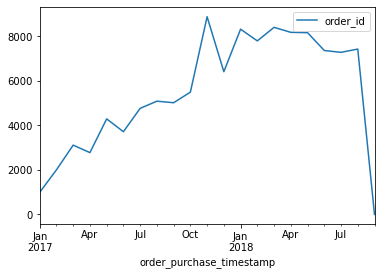

In [137]:
order_group.plot(kind='line', x='order_purchase_timestamp', y='order_id')

In [ ]:
#what are the main categories sold on each period?

### How many confirmed orders per seller do we have?

In [169]:
# counting the number of order per seller
(
    df_orders
    .groupby(['seller_id'])[['order_status']]
    .count()
    .sort_values(by='order_status', ascending=False)
).head()

In [172]:
#counting the number of confirmed orders per seller
df_orders['delivered_orders'] = (
    df_orders.loc[df_orders['order_status'] == 'delivered']
    .groupby(['seller_id'])['seller_id']
    .count()
    .sort_values(ascending=False)
).to_frame()

In [174]:
# calculate the KPI's for each seller
# Approval's rate
df_orders['total_orders']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
115898   NaN
115899   NaN
115900   NaN
115901   NaN
115902   NaN
Name: total_orders, Length: 115520, dtype: float64

In [ ]:
#NLP for the reviews -> how can I use that?